In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
#! Constantes de endereço necessárias para melhor organização de diretórios e pastas de trabalho.
#
SRC_DIR = os.path.join( os.path.abspath('..'), 'src')
BASE_DIR = os.path.dirname(SRC_DIR)
DATA_DIR = os.path.join(BASE_DIR, 'data')
IMGS_DIR = os.path.join(BASE_DIR, 'imgs')

In [3]:
input_file = 'capacidade_carga_solo.xlsx'
input_path = os.path.join(DATA_DIR, input_file)

In [4]:
colunas = ['B (m)',
 'Df (m)',
 'L/B',
 'γ (kN/m³)',
 'ϕ (°)',
 'qlim (kPa)']

In [5]:
def fetch_capacidade_carga_solo_data(input_path):

    if not os.path.isdir(DATA_DIR):
        os.makedirs(DATA_DIR)

    carga_solo = pd.read_excel(
        input_path,
        sheet_name = 'Planilha1',
        header = 0,
        engine='openpyxl',
        usecols= colunas
    )
    carga_solo.to_csv(os.path.join(DATA_DIR, 'carga_solo.csv'))
    return carga_solo

In [6]:
carga_solo = fetch_capacidade_carga_solo_data(input_path)
carga_solo.head()

,B (m),Df (m),L/B,γ (kN/m³),ϕ (°),qlim (kPa)
0,0.6,0.3,2.0,9.85,34.9,270.0
1,0.6,0.0,2.0,10.20,37.7,200.0
2,0.6,0.3,2.0,10.20,37.7,570.0
3,0.6,0.0,2.0,10.85,44.8,860.0
4,0.6,0.3,2.0,10.85,44.8,1760.0


In [7]:
carga_solo.shape

(207, 6)

### Há algum dado faltante 

In [8]:
carga_solo.isna().sum()

B (m)         0
Df (m)        0
L/B           0
γ (kN/m³)     0
ϕ (°)         0
qlim (kPa)    0
dtype: int64

## Vamos checar os tipos de dados

In [9]:
carga_solo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   B (m)       207 non-null    float64
 1   Df (m)      207 non-null    float64
 2   L/B         207 non-null    float64
 3   γ (kN/m³)   207 non-null    float64
 4   ϕ (°)       207 non-null    float64
 5   qlim (kPa)  207 non-null    float64
dtypes: float64(6)
memory usage: 9.8 KB


### Descrição estatística dos dados

In [10]:
carga_solo.describe().T

,count,mean,std,min,25%,50%,75%,max
B (m),207.0,0.511193,0.443030,0.03,0.152,0.500,0.70,3.016
Df (m),207.0,0.160483,0.269826,0.00,0.000,0.029,0.25,1.040
L/B,207.0,2.002319,1.795711,1.00,1.000,1.000,2.00,6.000
γ (kN/m³),207.0,15.581787,2.682619,8.60,14.700,16.100,16.80,20.600
ϕ (°),207.0,38.869565,3.597962,28.00,37.000,39.000,41.50,46.300
qlim (kPa),207.0,480.924638,440.621093,14.00,186.500,342.500,628.00,2847.000


## Separando os tipos de coluna: numéricas 

In [11]:
def split_type_features(df, target):
    """
        Esta função recebe como argumentos df (dataframe) e target      (variável dependente) e retorna uma tupla com a lista de features     numéricas e categóricas.
    """

    numeric_features = df.drop(target, axis = 1).select_dtypes(include=['int64', 'float64']).columns

    categorical_features = df.select_dtypes(exclude=['number']).columns

    return numeric_features, categorical_features

In [12]:
numeric_features, categorical_features = split_type_features(carga_solo, target= 'qlim (kPa)')
numeric_features

Index(['B (m)', 'Df (m)', 'L/B', 'γ (kN/m³)', 'ϕ (°)'], dtype='object')

In [13]:
import seaborn as sns   
import matplotlib.pyplot as plt 
import matplotlib as mpl  
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
pd.options.display.max_columns = 200
pd.options.display.float_format = '{:.2f}'.format
from IPython.core.pylabtools import figsize
figsize(12, 8)

In [14]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMGS_DIR, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

No handles with labels found to put in legend.


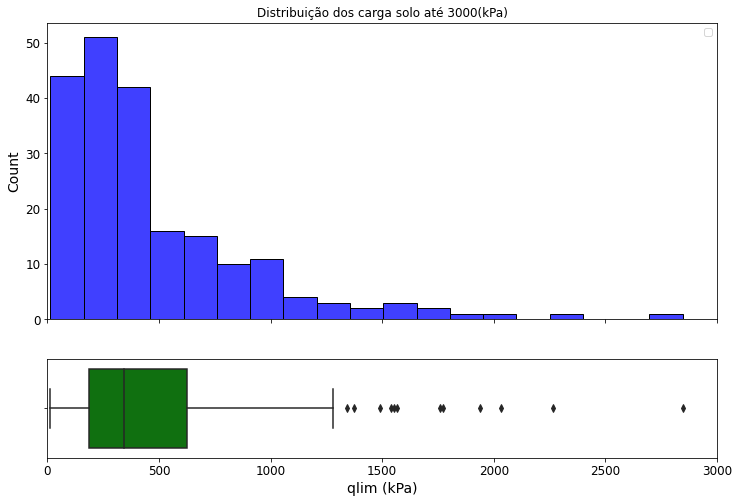

Saving figure Target_distribution


In [15]:
fig, (ax_hist, ax_box) = plt.subplots(2, sharex=True, 
      gridspec_kw={"height_ratios": (0.75, 0.25)})
sns.histplot(
    data = carga_solo['qlim (kPa)'],
    stat = 'count',
    bins = "auto",
    color = 'b',
    edgecolor = 'k',
    legend=True,
    ax = ax_hist,
)
sns.boxplot(x = carga_solo['qlim (kPa)'], ax = ax_box, color = 'green')
# sns.despine(ax = ax_hist)
# sns.despine(ax = ax_box)
plt.xlim(0, 3000)
ax_hist.set(title = 'Distribuição dos carga solo até 3000(kPa)')
ax_hist.legend()
plt.show()
save_fig("Target_distribution")
plt.close()

In [16]:
features_numericas = ['B (m)', 'Df (m)', 'L/B', 'γ (kN/m³)', 'ϕ (°)']
np.random.seed(123)

Saving figure Plots_dos_atributos


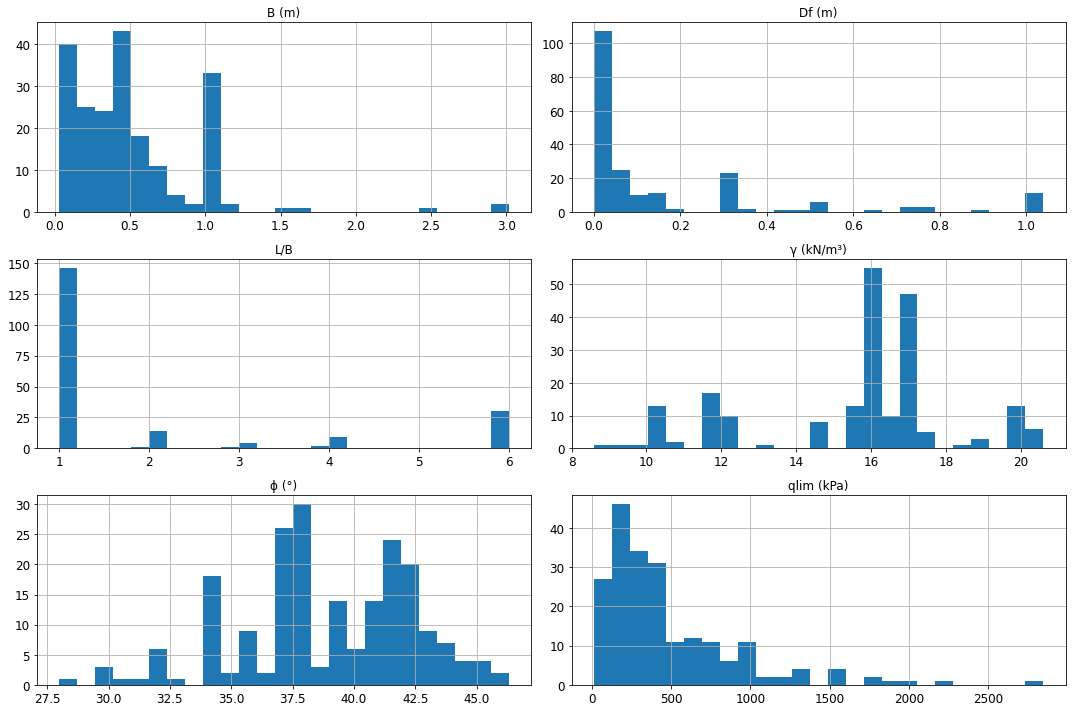

In [17]:
%matplotlib inline
carga_solo.hist(bins = 25, figsize=(15, 10))
save_fig("Plots_dos_atributos")
plt.show()
plt.close()


## Análise multivariada

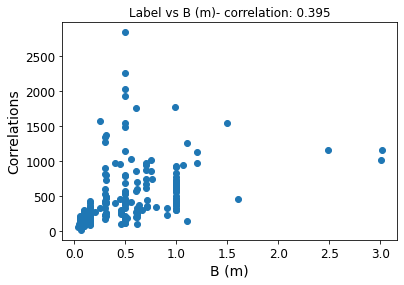

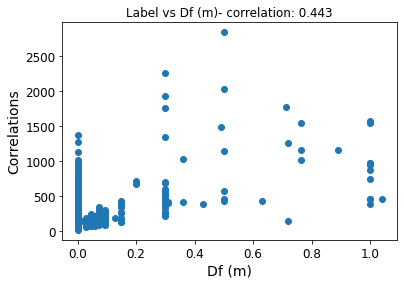

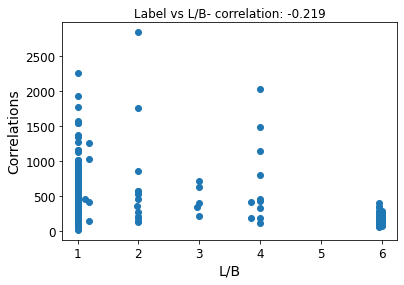

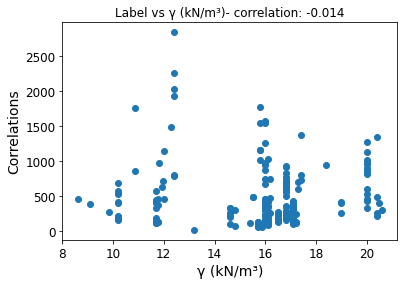

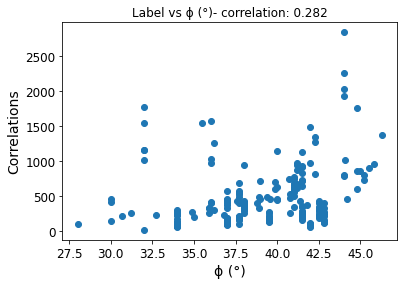

In [18]:
label = carga_solo[carga_solo.columns[-1]]
numerical_features = carga_solo.drop('qlim (kPa)', axis = 1).select_dtypes(include = [np.number])

for col in numerical_features:
    fig = plt.figure()
    ax = fig.gca()
    feature = carga_solo[col]
    correlation =  np.round(feature.corr(label), 3)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Correlations')
    ax.set_title('Label vs ' + col + '- correlation: ' + str(correlation))
plt.show()

[Text(0.5, 0, 'B (m)'),
 Text(1.5, 0, 'Df (m)'),
 Text(2.5, 0, 'L/B'),
 Text(3.5, 0, 'γ (kN/m³)'),
 Text(4.5, 0, 'ϕ (°)'),
 Text(5.5, 0, 'qlim (kPa)')]

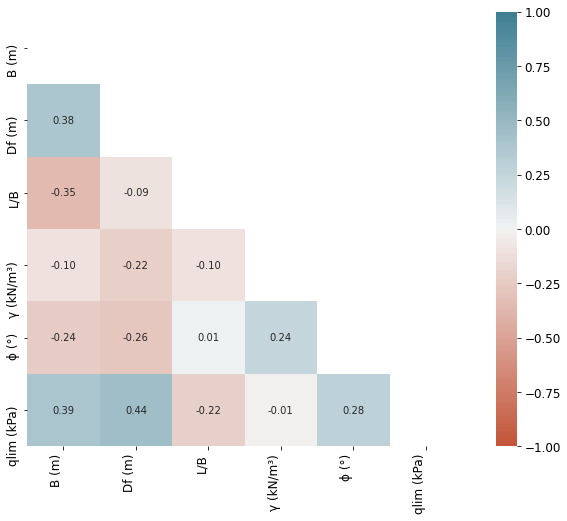

In [19]:
figsize(12, 8)
corr = carga_solo.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(
    corr,
    mask = mask,
    annot=True, fmt="2.2f" ,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
)

In [20]:
carga_solo.corr().style.background_gradient(cmap = 'coolwarm')

,B (m),Df (m),L/B,γ (kN/m³),ϕ (°),qlim (kPa)
B (m),1.000000,0.379941,-0.354496,-0.102474,-0.239259,0.394603
Df (m),0.379941,1.000000,-0.093505,-0.219935,-0.264836,0.442545
L/B,-0.354496,-0.093505,1.000000,-0.101771,0.008166,-0.218702
γ (kN/m³),-0.102474,-0.219935,-0.101771,1.000000,0.242807,-0.013838
ϕ (°),-0.239259,-0.264836,0.008166,0.242807,1.000000,0.281500
qlim (kPa),0.394603,0.442545,-0.218702,-0.013838,0.281500,1.000000


In [21]:
import ppscore as pps
matrix = pps.matrix(carga_solo)

In [22]:
df = carga_solo.copy()
def heatmap(df):
    df = df[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
    ax = sns.heatmap(df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
    ax.set_title("PPS matrix")
    ax.set_xlabel("feature")
    ax.set_ylabel("target")
    return ax

def corr_heatmap(df):
    ax = sns.heatmap(df, vmin=-1, vmax=1, cmap="BrBG", linewidths=0.5, annot=True)
    ax.set_title("Correlation matrix")
    return ax


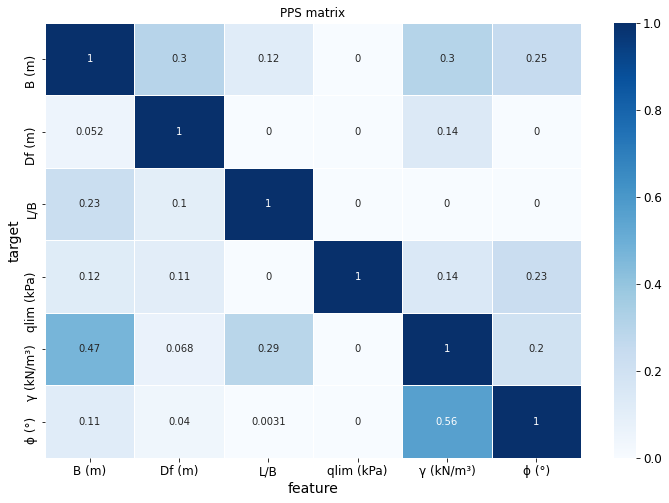

In [23]:
heatmap(matrix)
plt.show()
plt.close()

Usando as matrizes de correlação e de predição quais as features são os melhores preditores para a variável carga do solo.


In [24]:
features = df.drop(['qlim (kPa)'], axis = 1).columns.to_list()
for x in features:
    display(pps.score(df, x,'qlim (kPa)'))

{'x': 'B (m)',
 'y': 'qlim (kPa)',
 'ppscore': 0.11763208593635399,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 291.99024154589364,
 'model_score': 257.64282035979033,
 'model': DecisionTreeRegressor()}

{'x': 'Df (m)',
 'y': 'qlim (kPa)',
 'ppscore': 0.10575032271851992,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 291.99024154589364,
 'model_score': 261.1121792717568,
 'model': DecisionTreeRegressor()}

{'x': 'L/B',
 'y': 'qlim (kPa)',
 'ppscore': 0,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 291.99024154589364,
 'model_score': 321.94185551920816,
 'model': DecisionTreeRegressor()}

{'x': 'γ (kN/m³)',
 'y': 'qlim (kPa)',
 'ppscore': 0.14481927903101655,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 291.99024154589364,
 'model_score': 249.70442528112494,
 'model': DecisionTreeRegressor()}

{'x': 'ϕ (°)',
 'y': 'qlim (kPa)',
 'ppscore': 0.23274637960356515,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 291.99024154589364,
 'model_score': 224.0305699465164,
 'model': DecisionTreeRegressor()}

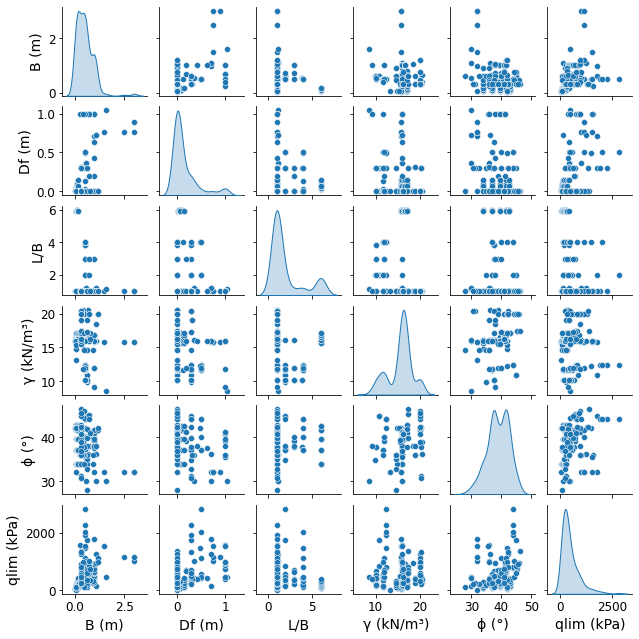

In [25]:
# pairplot
sns.pairplot(carga_solo, diag_kind = 'kde',palette = 'Dark2',  height = 1.5)
plt.show()
plt.close()

A one-dimensional ranking of features utilizes a ranking algorithm that takes into account only a single feature at a time (e.g. histogram analysis). By default we utilize the Shapiro-Wilk algorithm to assess the normality of the distribution of instances with respect to the feature. A barplot is then drawn showing the relative ranks of each feature.

In [26]:
from yellowbrick.features import Rank1D

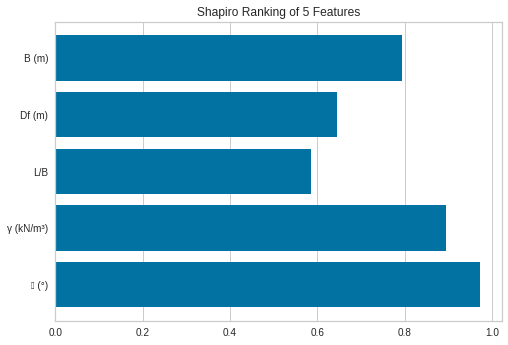

<AxesSubplot:title={'center':'Shapiro Ranking of 5 Features'}>

In [27]:
X =  df.drop('qlim (kPa)', axis = 1)
y =  df['qlim (kPa)']
# Instantiate the 1D visualizer with the Sharpiro ranking algorithm
visualizer = Rank1D(algorithm='shapiro', features = X.columns.to_list(), show_feature_names= True)
visualizer.fit(X.values, y.values)           # Fit the data to the visualizer
visualizer.transform(X)                      # Transform the data
visualizer.show()                            # Finalize and render the figure

In [28]:
df.columns.to_list()

['B (m)', 'Df (m)', 'L/B', 'γ (kN/m³)', 'ϕ (°)', 'qlim (kPa)']

In [29]:
features = ['B (m)', 'Df (m)', 'L/B', 'γ (kN/m³)', 'ϕ (°)', 'qlim (kPa)']

## Avaliação dos modelos de machine learning
***

In [30]:
X = df.drop('qlim (kPa)', axis = 1)
y = df['qlim (kPa)']

In [31]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split

from yellowbrick.regressor import PredictionError, ResidualsPlot
from yellowbrick.regressor.alphas import AlphaSelection

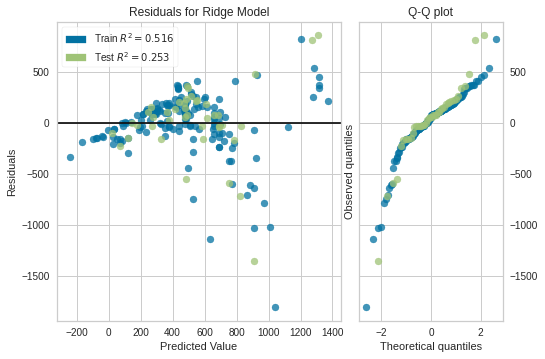

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [32]:
from yellowbrick.regressor import ResidualsPlot
# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear model and visualizer
model = Ridge()
visualizer = ResidualsPlot(model, hist = False, qqplot = True)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

In [33]:
import xgboost as xgb
import sklearn
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error,  explained_variance_score, max_error, median_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

from sklearn import set_config
set_config(display = 'diagram')

In [34]:
from scipy import stats
features = ['B (m)', 'Df (m)', 'L/B', 'γ (kN/m³)', 'ϕ (°)']
target = 'qlim (kPa)'
def pearson_corr_p_value(df, feature, target):

    pearson_coef, p_value = stats.pearsonr(df[feature], df[target])
    return pearson_coef, p_value

In [35]:
for feature in features:
    print(f"The Pearson correlation between {feature} and  variable target = '{target}' is:")
    pearson_coef, p_value = pearson_corr_p_value(df, feature, target = 'qlim (kPa)')
    print(f"correlation = {pearson_coef}, with a P-value of P = {p_value}\n")

The Pearson correlation between B (m) and  variable target = 'qlim (kPa)' is:
correlation = 0.39460310786739017, with a P-value of P = 4.0175643174482195e-09

The Pearson correlation between Df (m) and  variable target = 'qlim (kPa)' is:
correlation = 0.4425449058641254, with a P-value of P = 2.446916526769771e-11

The Pearson correlation between L/B and  variable target = 'qlim (kPa)' is:
correlation = -0.21870243128134592, with a P-value of P = 0.0015458216176595298

The Pearson correlation between γ (kN/m³) and  variable target = 'qlim (kPa)' is:
correlation = -0.013837825655347693, with a P-value of P = 0.8431268102744274

The Pearson correlation between ϕ (°) and  variable target = 'qlim (kPa)' is:
correlation = 0.28150029699408763, with a P-value of P = 3.974463678209911e-05



In [36]:
# Pipeline de processamento
#
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Preprocessamento
#
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, features)])

In [37]:
def quick_eval(preprocessor, *args, verbose = True):
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    training_score = model.score(X_train, y_train)
    testing_score = r2_score(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(MSE)
    if verbose:
        print(f"Regression algorithm: {model.named_steps['regressor'].__class__.__name__}")
        print(f"Train R2 = {training_score:.3f}, Test R2 = {testing_score:.3f}")
        print(f"MSE: {MSE:.2f}, RMSE = {rmse:.2f}")
        print("---***---")
   
    
    return model.named_steps['regressor']

from sklearn.svm import LinearSVR
regressors = [
    LinearRegression(),
    Lasso(alpha=.5),
    Ridge(alpha=.1),
    ElasticNet(alpha = 0.1, l1_ratio = 0.5),
    LinearSVR(epsilon = 1.5),
    DecisionTreeRegressor(random_state=123),
    RandomForestRegressor(random_state=123),
    AdaBoostRegressor(random_state=123),
    GradientBoostingRegressor(random_state=123),
    xgb.XGBRegressor(objective="reg:squarederror", random_state=123)
    ]

for r in regressors:
        model = Pipeline(steps = [
            ('preprocessor', preprocessor),
            ('regressor', r)
        ])
        quick_eval(preprocessor, X_train, y_train, X_test, y_test, verbose = True)

Regression algorithm: LinearRegression
Train R2 = 0.517, Test R2 = 0.235
MSE: 134153.29, RMSE = 366.27
---***---
Regression algorithm: Lasso
Train R2 = 0.517, Test R2 = 0.236
MSE: 133994.46, RMSE = 366.05
---***---
Regression algorithm: Ridge
Train R2 = 0.517, Test R2 = 0.235
MSE: 134113.19, RMSE = 366.21
---***---
Regression algorithm: ElasticNet
Train R2 = 0.516, Test R2 = 0.251
MSE: 131337.06, RMSE = 362.40
---***---
Regression algorithm: LinearSVR
Train R2 = -0.507, Test R2 = -0.734
MSE: 304076.31, RMSE = 551.43
---***---
Regression algorithm: DecisionTreeRegressor
Train R2 = 0.992, Test R2 = 0.577
MSE: 74223.82, RMSE = 272.44
---***---
Regression algorithm: RandomForestRegressor
Train R2 = 0.957, Test R2 = 0.672
MSE: 57494.70, RMSE = 239.78
---***---
Regression algorithm: AdaBoostRegressor
Train R2 = 0.835, Test R2 = 0.612
MSE: 68105.34, RMSE = 260.97
---***---
Regression algorithm: GradientBoostingRegressor
Train R2 = 0.975, Test R2 = 0.735
MSE: 46385.67, RMSE = 215.37
---***---


In [38]:
X = df.drop('qlim (kPa)', axis = 1)
y = df['qlim (kPa)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [39]:
display(X_train.shape, len(y_train))
display(X_test.shape, len(y_test))


(165, 5)

165

(42, 5)

42

## Treinando o modelo 
***

In [40]:
gbtr = GradientBoostingRegressor(random_state=123)
gbtr

GradientBoostingRegressor(random_state=123)

In [41]:
model_baseline = gbtr.fit(X_train, y_train)
model_baseline

GradientBoostingRegressor(random_state=123)

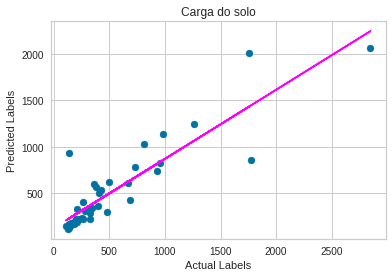

In [42]:
predictions = model_baseline.predict(X_test)
%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Carga do solo')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

There's a definite diagonal trend, and the intersections of the predicted and actual values are generally following the path of the trend line; but there's a fair amount of difference between the ideal function represented by the line and the results. This variance represents the *residuals* of the model - in other words, the difference between the label predicted when the model applies the coefficients it learned during training to the validation data, and the actual value of the validation label. These residuals when evaluated from the validation data indicate the expected level of *error* when the model is used with new data for which the label is unknown.

You can quantify the residuals by calculating a number of commonly used evaluation metrics. We'll focus on the following three:

- **Mean Square Error (MSE)**: The mean of the squared differences between predicted and actual values. This yields a relative metric in which the smaller the value, the better the fit of the model
- **Root Mean Square Error (RMSE)**: The square root of the MSE. This yields an absolute metric in the same unit as the label (in this case, numbers of rentals). The smaller the value, the better the model (in a simplistic sense, it represents the average number of rentals by which the predictions are wrong!)
- **Coefficient of Determination (usually known as *R-squared* or R<sup>2</sup>)**: A relative metric in which the higher the value, the better the fit of the model. In essence, this metric represents how much of the variance between predicted and actual label values the model is able to explain.

In [43]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 60903.135583333016
RMSE: 246.7856065157225
R2: 0.7916420327723559


In [44]:
from sklearn.tree import export_text

# Train the model
model = DecisionTreeRegressor().fit(X_train, y_train)
print (model, "\n")

# Visualize the model tree
tree = export_text(model)
print(tree)

DecisionTreeRegressor() 

|--- feature_1 <= 0.18
|   |--- feature_0 <= 0.23
|   |   |--- feature_3 <= 16.30
|   |   |   |--- feature_1 <= 0.07
|   |   |   |   |--- feature_4 <= 33.00
|   |   |   |   |   |--- value: [14.00]
|   |   |   |   |--- feature_4 >  33.00
|   |   |   |   |   |--- feature_4 <= 35.50
|   |   |   |   |   |   |--- feature_1 <= 0.04
|   |   |   |   |   |   |   |--- value: [58.50]
|   |   |   |   |   |   |--- feature_1 >  0.04
|   |   |   |   |   |   |   |--- feature_2 <= 5.97
|   |   |   |   |   |   |   |   |--- feature_1 <= 0.05
|   |   |   |   |   |   |   |   |   |--- value: [67.70]
|   |   |   |   |   |   |   |   |--- feature_1 >  0.05
|   |   |   |   |   |   |   |   |   |--- value: [70.91]
|   |   |   |   |   |   |   |--- feature_2 >  5.97
|   |   |   |   |   |   |   |   |--- value: [74.70]
|   |   |   |   |   |--- feature_4 >  35.50
|   |   |   |   |   |   |--- feature_0 <= 0.03
|   |   |   |   |   |   |   |--- value: [52.00]
|   |   |   |   |   |   |--- feature

# Hiperparametrização (Tuning do algoritmo)
***

Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 150} 

GradientBoostingRegressor(n_estimators=150) 

MSE: 70766.80598394161
RMSE: 266.02031122442816
R2: 0.7578970655487518


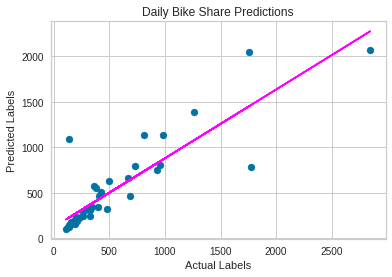

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [46]:
num_features, cat_features = split_type_features(df = df, target = 'qlim (kPa)')
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Preprocessamento
#
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features)])

In [47]:
baseline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('gbrt', GradientBoostingRegressor(
        random_state = 123))])

baseline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['B (m)', 'Df (m)', 'L/B', 'γ (kN/m³)', 'ϕ (°)'], dtype='object'))])),
                ('gbrt', GradientBoostingRegressor(random_state=123))])

In [48]:
y_pred = baseline.predict(X_test)

r2_score(y_test, y_pred)

0.7916420327723559

In [49]:
baseline = GradientBoostingRegressor(n_estimators = 200, max_depth= 5)
baseline.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=200)

In [50]:
predictions = baseline.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 54746.334262652286
RMSE: 233.97934580353945
R2: 0.8127052932352962


In [51]:
important_features = pd.Series(baseline.feature_importances_, index=X.columns).\
                        sort_values(ascending=False)

important_features

ϕ (°)       0.46
Df (m)      0.32
B (m)       0.14
γ (kN/m³)   0.08
L/B         0.00
dtype: float64

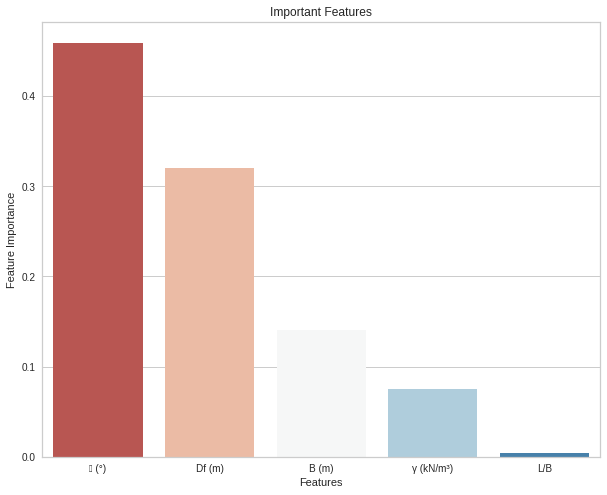

In [52]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot( x = important_features.index, y = important_features, palette = "RdBu")

plt.xlabel('Features')
plt.ylabel('Feature Importance')

plt.title("Important Features")
plt.show()

In [53]:
gbrt = GradientBoostingRegressor(max_depth=5)
parameters = {'n_estimators': [1, 5, 10, 50, 100, 200, 300, 400, 500]}

gridsearch_reg = GridSearchCV(estimator=gbrt, param_grid=parameters, cv=10)

In [54]:
gridsearch_reg.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(max_depth=5),
             param_grid={'n_estimators': [1, 5, 10, 50, 100, 200, 300, 400,
                                          500]})

In [55]:
gridsearch_reg.best_params_

{'n_estimators': 200}

In [56]:
gbrt_best = GradientBoostingRegressor(max_depth=3, 
                                n_estimators = gridsearch_reg.best_params_['n_estimators'])

gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=200)

In [57]:
gbrt = GradientBoostingRegressor(max_depth=5, learning_rate=0.2, n_estimators= 72)
parameters = {'learning_rate': [0.3, 0.2, 0.1, 0.05, 0.01, 0.001],
              'max_depth'    : [3, 4, 5, 6, 7, 8, 9]}

gridsearch_reg = GridSearchCV(estimator=gbrt, param_grid=parameters, cv=10)

gridsearch_reg.fit(X_train, y_train)

gridsearch_reg.best_params_

{'learning_rate': 0.3, 'max_depth': 3}

In [58]:
y_pred = gbrt_best.predict(X_test)
predictions = y_pred
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)


MSE: 66264.68251573943
RMSE: 257.41927378450015
R2: 0.7732994464780383


# Tunning for n_estimators
***

warm_start=True allows you to add more estimators to an already fitted model.


In [59]:
min_val_error = float("inf")
error_increasing = 0

for n_estimators in range(1, 1000):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    
    y_pred = gbrt.predict(X_test)
    val_error = mean_squared_error(y_test, y_pred)
    
    print('No. of estimators: ', gbrt.n_estimators_)
    print('Validation error: ', val_error)
    
    if val_error < min_val_error:
        min_val_error = val_error
        error_increasing = 0
    else:
        error_increasing += 1
        if error_increasing == 10:
            break

No. of estimators:  1
Validation error:  207920.5525854428
No. of estimators:  2
Validation error:  153910.36849687214
No. of estimators:  3
Validation error:  122930.87595468803
No. of estimators:  4
Validation error:  91121.90708280743
No. of estimators:  5
Validation error:  78281.54575690365
No. of estimators:  6
Validation error:  71548.52330138172
No. of estimators:  7
Validation error:  58093.4262462016
No. of estimators:  8
Validation error:  59555.779481670106
No. of estimators:  9
Validation error:  52777.18483598653
No. of estimators:  10
Validation error:  57055.208491040015
No. of estimators:  11
Validation error:  56292.986520844264
No. of estimators:  12
Validation error:  51828.27815592443
No. of estimators:  13
Validation error:  52137.73601956597
No. of estimators:  14
Validation error:  45317.34316132237
No. of estimators:  15
Validation error:  49713.175328085956
No. of estimators:  16
Validation error:  49231.785762503714
No. of estimators:  17
Validation error:  5

In [60]:
n_estimators

24

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [62]:
gbrt_best = GradientBoostingRegressor(
    max_depth=7,
    learning_rate = 0.1,
    n_estimators = n_estimators)

gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=7, n_estimators=24)

In [63]:
y_pred = gbrt_best.predict(X_test)
predictions = y_pred
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 42103.978142002
RMSE: 205.19253919673102
R2: 0.690671505981944


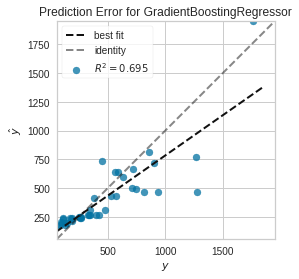

<AxesSubplot:title={'center':'Prediction Error for GradientBoostingRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [64]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer

gbrt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('gbrt', GradientBoostingRegressor(
        n_estimators=n_estimators,
        max_depth = 7,
        learning_rate= 0.1,
        random_state = 123))])

# gbrt.fit(X_train, y_train)
model = GradientBoostingRegressor(n_estimators=n_estimators, random_state = 123)
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show() 

In [65]:
metricas = ["neg_mean_squared_error", "r2"]
# Cross validate the model
cross_validate(
    gbrt, X, y,
    return_train_score=True,
    scoring = metricas
)

{'fit_time': array([0.02554488, 0.0306499 , 0.02437997, 0.03137708, 0.02861261]),
 'score_time': array([0.00723481, 0.00472975, 0.00605321, 0.00536442, 0.00633717]),
 'test_neg_mean_squared_error': array([-336760.87808921, -106285.96157211,  -83467.71427547,
        -171890.25745761, -113496.09276361]),
 'train_neg_mean_squared_error': array([-2998.41373227, -4131.06604655, -4047.3139585 , -3108.50324617,
        -2703.08055578]),
 'test_r2': array([ 0.1966226 ,  0.32080818, -0.61289959, -2.11443393,  0.24447284]),
 'train_r2': array([0.97665917, 0.9786039 , 0.98107066, 0.9860875 , 0.98641173])}

Cross-validation on gbrt baseline(without any hiperparametrization) to get a baseline error to compare with any future results

In [66]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
baseline = GradientBoostingRegressor(n_estimators = 200, max_depth= 5, random_state= 123)
mse = make_scorer(mean_squared_error)

# Set up cross_val_score
cv = cross_val_score(estimator = baseline,
                     X = X,
                     y = y,
                     cv = LeaveOneOut(),
                     scoring=make_scorer(mean_squared_error))

# Print the mean error
print(cv.mean())

38069.89400929088


In [67]:
# LOOCV Example
n = X.shape[0]
mse = make_scorer(mean_squared_error)
cv_results = cross_val_score(baseline, X, y, scoring=mse, cv = LeaveOneOut())
print(cv_results.mean(), np.sqrt(cv_results.mean()))

38069.89400929088 195.1150788875398


In [68]:
from sklearn.metrics import mean_absolute_error
# Create scorer
mae_scorer = make_scorer(mean_absolute_error)

gbrt = GradientBoostingRegressor(n_estimators=71, random_state = 123)

# Implement LOOCV
scores = cross_val_score(gbrt, X=X, y=y, cv=y.shape[0], scoring=mae_scorer)

# Print the mean and standard deviation
print("The mean of the errors is: %s." % np.mean(scores))
print("The standard deviation of the errors is: %s." % np.std(scores))

The mean of the errors is: 115.00137133696232.
The standard deviation of the errors is: 167.29357422883606.


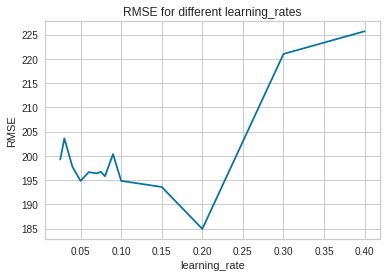

In [69]:
# Set the learning rates & RMSE list
# learn_rates = np.linspace(0.01, 0.2, num=15)
learn_rates = [0.025, 0.03, 0.04, 0.05, 0.06, 0.07, 0.075, 0.08, 0.09,  0.1, 0.15, 0.2, 0.3, 0.4]
RMSE = []

# Create the for loop to evaluate model predictions for each learning rate
for learning_rate in learn_rates:
    model = GradientBoostingRegressor(learning_rate=learning_rate, random_state = 123)
    predictions = model.fit(X_train, y_train).predict(X_test)
    RMSE.append([np.sqrt(mean_squared_error(y_test, predictions))])

# Plot results    
plt.plot(learn_rates, RMSE)
plt.gca().set(xlabel='learning_rate', ylabel='RMSE', title='RMSE for different learning_rates')
plt.show() 

In [70]:
gbrt = GradientBoostingRegressor(random_state= 123)
grid_parameters = {
    'learning_rate' : [0.2],
    'n_estimators'  : [24],
    'max_depth'     : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'subsample'     : [0,6,0.8,1.0]
}

n = X_train.shape[0]
kfold = KFold(n_splits = n, shuffle = True, random_state = 123)

gbrt_GS = GridSearchCV(
    gbrt,
    param_grid= grid_parameters,
    scoring = metricas,
    refit = "neg_mean_squared_error",
    return_train_score = True,
    verbose = 1,
    cv = kfold,
    n_jobs=-1
)

gbrt_GS.fit(X_train, y_train)
#! Print the best parameters and best estimator
#!
print("Best parameters found:\n ", gbrt_GS.best_params_)

Fitting 165 folds for each of 40 candidates, totalling 6600 fits
Best parameters found:
  {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 24, 'subsample': 1.0}


In [71]:
print("Best estimator found: ", gbrt_GS.best_estimator_)

Best estimator found:  GradientBoostingRegressor(learning_rate=0.2, max_depth=5, n_estimators=24,
                          random_state=123)


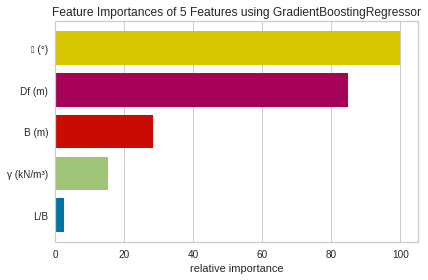

<AxesSubplot:title={'center':'Feature Importances of 5 Features using GradientBoostingRegressor'}, xlabel='relative importance'>

In [72]:
final_model = gbrt_GS.best_estimator_
from yellowbrick.model_selection import FeatureImportances
model = GradientBoostingRegressor(n_estimators=24, max_depth=5, learning_rate=0.2, random_state=123)
viz = FeatureImportances(model)
viz.fit(X, y)
viz.show()

In [73]:
def RMSE(y_test, y_pred):
    """
    Calculates Root Mean Squared Error between the actual and the predicted labels.
    
    """
    RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
    return RMSE


# Função para calcular as métricas do modelo
#
def show_scores(model, name):

    k = X.shape[1]
    n = len(y)
    y_pred = model.predict(X_test)
    

    # explained variance score
    evars = explained_variance_score(y_test, y_pred)
    # maximum residual error
    max_erro = max_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    medae = median_absolute_error(y_test, y_pred)
    r2_training = model.score(X_train, y_train)
    r2_true = r2_score(y_test, y_pred)
    # r2 score ajustado para o número de features
    #  é a única métrica aqui que considera o problema de overfitting 
    r2_adjusted = 1 - ( (1 - r2_true) * (n - 1)/ (n - k - 1) )
    rmse = RMSE(y_test, y_pred)
    # mean absolute percentual error
    mape = np.mean( np.abs( (y_test - y_pred) / y_test ) ) * 100
     
    scores = {
        "model name" : name, 
        "R2_score(training data)" : np.round(r2_training, 3),
        "R2_score(test data)" : np.round(r2_true, 3),
        "R2_adjusted" : np.round(r2_adjusted, 3),
        "Explained Variance Score" : np.round(evars, 3),
        "Mean Absolute Error" : np.round(mae, 3),
        "Median Absolute Error" : np.round(medae, 3),
        "Maximum Residual Error" : np.round(max_erro, 3),
        "Mean Square Error" : np.round(mse, 3),
        "Root Mean Square Error" : np.round(rmse, 3),
        "Mean Absolute Percentual Error(%)" : np.round(mape, 3)
    }
    metricas = pd.Series(scores)
    return metricas

In [74]:
show_scores(model = final_model, name = 'GradientBoostingRegressor')

model name                           GradientBoostingRegressor
R2_score(training data)                                   0.99
R2_score(test data)                                       0.69
R2_adjusted                                               0.69
Explained Variance Score                                   0.7
Mean Absolute Error                                     104.52
Median Absolute Error                                    35.62
Maximum Residual Error                                   839.1
Mean Square Error                                     41593.72
Root Mean Square Error                                  203.94
Mean Absolute Percentual Error(%)                         18.0
dtype: object

In [75]:
def predict_dataframe(model_name):

    df['qlim (kPa)']
    # Dataframe de predição 
    #
    y_pred = model_name.predict(X_test)
    residuals = y_test - y_pred
    df_pred_actual = pd.DataFrame({
   
    'qlim(kPa)-estimado'             : np.round(y_pred, 3),    # recalque_estimado
    'qlim(kPa)-real'                 : np.round(y_test, 3),    # recalque_real
    'erro_residual(kPa)'          : np.round(residuals, 3)  # diferença
})
    return df_pred_actual.reset_index(drop=True)

In [76]:
df_results = predict_dataframe(final_model)
df_results.head()

,qlim(kPa)-estimado,qlim(kPa)-real,erro_residual(kPa)
0,253.14,244.60,-8.54
1,721.45,900.00,178.55
2,142.99,109.00,-33.99
3,198.93,191.60,-7.33
4,634.34,560.00,-74.34


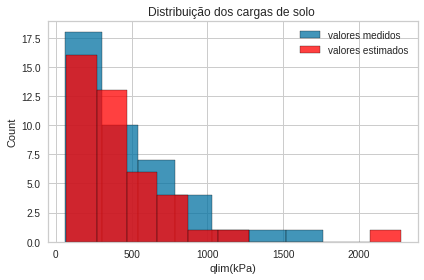

In [77]:
fig, ax = plt.subplots()
sns.histplot(
    data = df_results['qlim(kPa)-real'],
    color = 'b',
    stat = "count",
    label = 'valores medidos', 
    ax = ax)

sns.histplot(
    data = df_results['qlim(kPa)-estimado'],
    color = 'red',
    stat = "count",
    label = 'valores estimados',
    ax = ax)
    
ax.legend()
ax.set(title = "Distribuição dos cargas de solo ", xlabel = "qlim(kPa)")
plt.tight_layout()
plt.show()
plt.close()